This section we use PCA-KNN model to classify images of skin cancers

In [257]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.decomposition import PCA

In [258]:
# viewcolumn(columnvector);
# VIEWCOLUMN Displays a 28 x 28 grayscale image stored in a column vector.
# Tim Marks 2002

def viewcolumn(columnvector):
    plt.imshow(columnvector.reshape([28,28], order='F'), cmap=plt.get_cmap('gray'))

Read in the HMNIST dataset. Each datapoint is a 28 by 28 grayscale image

In [259]:
hmnist_dataset = pd.read_csv("hmnist_28_28_L.csv").to_numpy()

View one image from the dataset

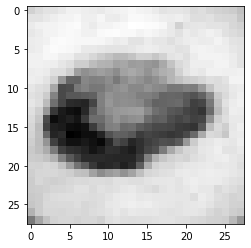

In [267]:
viewcolumn(hmnist_dataset[1900][0:784])

Split the data set into training (75%), validation (15%), and test (10%)

In [261]:
dimension = 784
hmnist_X = hmnist_dataset.T[0:dimension].T
hmnist_y  = hmnist_dataset.T[dimension].T

# First split the whole dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(hmnist_X, hmnist_y, test_size=0.25)
# Then split the test dataset into validation and test
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.4)

Below is the hyperparameters for this model. They can be tuned to get better prediction results

In [262]:
pca_components = 784
knn_neighbors = 20

Run PCA on the train dataset

In [268]:
X_train_reduced = PCA(n_components = pca_components).fit_transform(X_train)

Train KNN on the PCA coordinates

In [264]:
knn_model = KNN(n_jobs=-1,n_neighbors=knn_neighbors,weights='uniform')
knn_model.fit(X_train_reduced,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
                     weights='uniform')

Test on validation set to tune hyperparameters

In [265]:
X_valid_reduced = PCA().fit_transform(X_valid)
valid_pred = knn_model.predict(X_valid_reduced)
valid_result = []
for i in range(len(y_valid)):
    if (y_valid[i] == valid_pred[i]):
        valid_result.append(1)
    else:
        valid_result.append(0)
valid_accuracy = sum(valid_result) / len(y_valid)

print("Validation accuracy is %f" %valid_accuracy)

Validation accuracy is 0.653795


In [266]:

X_test_reduced = PCA().fit_transform(X_test)
test_pred = knn_model.predict(X_test)
test_result = []
for i in range(len(y_test)):
    if (y_test[i] == test_pred[i]):
        test_result.append(1)
    else:
        test_result.append(0)
test_accuracy = sum(test_result) / len(y_test)

print("Test accuracy is %f" %test_accuracy)



Test accuracy is 0.680639
